In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
diabetes = pd.read_csv("lr_diabetes.csv")

In [4]:
diabetes.head()

,bmi,Progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [5]:
diabetes.shape

(442, 2)

In [6]:
#X = diabetes.values[:,0].reshape(-1,1)
#y = diabetes.values[:,1]

X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, 1].values

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=4) 

In [8]:
# Create linear regression object
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [9]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [11]:
y_pred

array([108.31997538, 168.13326654, 160.41542252,  80.3427908 ,
       186.46314609, 177.78057156, 125.68512443, 115.0730889 ,
        79.3780603 , 111.21416689, 122.79093292, 190.3220681 ,
       163.30961403, 149.80338699, 127.61458543, 151.73284799,
       183.56895458, 131.47350744, 129.54404644, 149.80338699,
       216.36979167, 146.90919548,  87.09590432, 181.63949357,
        98.67267035,  87.09590432, 175.85111056, 130.50877694,
       104.46105337, 110.24943638, 222.15817468,  99.63740086,
       296.44242338, 205.75775614, 102.53159236, 156.55650051,
       141.12081247, 189.3573376 , 136.29715995, 155.59177   ,
       179.71003257, 163.30961403, 195.14572061,  84.20171281,
       183.56895458, 109.28470588, 122.79093292, 117.0025499 ,
       200.93410363, 179.71003257, 129.54404644, 122.79093292,
       146.90919548, 194.18099011, 117.0025499 , 172.95691905,
       120.86147191,  81.30752131, 179.71003257, 254.95901177,
       129.54404644, 118.93201091, 168.13326654, 252.06

In [12]:
# The coefficients
print('Coefficients: \n', regr.coef_)
#Intercept
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [895.08229306]
Intercept: 
 152.46403514027705


In [20]:
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("For testing dataset")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y_test, y_pred))

For testing dataset
Mean squared error: 3114.13
R^2 Score: 0.42


In [22]:
print("For training dataset")

y_pred1 = regr.predict(X_train)

print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y_train, y_pred1))

For training dataset
Mean squared error: 4234.32
R^2 Score: 0.31


In [24]:
# Explained variance score: value is between 0 and 1 and 1 is for perfect prediction : 
# the proportion of the variance in the dependent variable(target) 
# that is predictable from the independent variable(s) (features)

print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.42


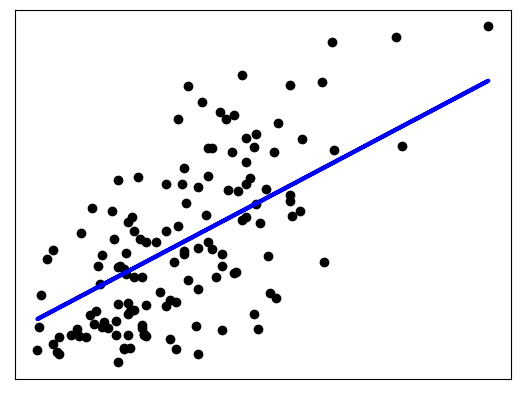

In [30]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
# predict the diabetes progression For a BMI of 0.05


In [32]:
regr.predict([[0.05]])

array([197.21814979])

In [33]:
'''
Understanding mean squared error
'''
round(np.mean((y_test-y_pred)**2),2)

3114.13

In [34]:
'''
Varience sore of r2_score = 1-(g/y)

g : Sum of Squared distance or difference between the observed 
    values and the predicted ones. 
    g = Sum((y_test[i] – y_pred[i]) **2)
y : Sum of the Squared distance between observed value 
    y_test and the average of observed values mean(y_test) : 
    y = Sum((y_test[i] – mean[y_test]) **2)
x
g. is called as residual sum of square
y is called as Total variation/SST/sum of squared error from mean

'''
g = np.sum((y_test-y_pred)**2)
y = np.sum((y_test-np.mean(y_test))**2)
print('Sum of Squared error',g)
print('Sum of residuals',y)
print('varience score is', round(1-(g/y),2))

Sum of Squared error 414179.0965439881
Sum of residuals 711930.992481203
varience score is 0.42
